<a href="https://colab.research.google.com/github/wesleiferreira98/Analise-do-Algoritmo-de-K-means/blob/main/An%C3%A1lise_do_Algoritmo_de_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação das bibliotecas necessarias 

In [ ]:
import gdown 
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import zipfile
import os

# Preparação dos Dados

In [4]:
# URL do arquivo no Google Drive
drive_url = "https://drive.google.com/uc?id=1mHErmi7eyo2b6an8tCOsj1FoJ54N7Pkg"

# Caminho para salvar o arquivo
zip_path = "UCI_HAR_Dataset.zip"

# Baixar o arquivo usando gdown
gdown.download(drive_url, zip_path, quiet=False)

# Extração do arquivo zip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("UCI_HAR_Dataset")

# Caminho dos dados extraídos
data_path = "UCI_HAR_Dataset/UCI HAR Dataset"

# Função para carregar os dados
def load_data(data_path, dataset_type="train"):
    X = pd.read_csv(os.path.join(data_path, f"{dataset_type}/X_{dataset_type}.txt"),
                    delim_whitespace=True, header=None)
    return X

# Combine os dados de treino e teste
X_train = load_data(data_path, "train")
X_test = load_data(data_path, "test")
X = pd.concat([X_train, X_test], axis=0).reset_index(drop=True)

print(f"Shape dos dados carregados: {X.shape}")

Downloading...
From (original): https://drive.google.com/uc?id=1mHErmi7eyo2b6an8tCOsj1FoJ54N7Pkg
From (redirected): https://drive.google.com/uc?id=1mHErmi7eyo2b6an8tCOsj1FoJ54N7Pkg&confirm=t&uuid=ecdb8433-c3a0-4a41-ad35-0abfa2ee67cc
To: /home/wesleiferreira/Documentos/GitHub/Analise-do-Algoritmo-de-K-means/UCI_HAR_Dataset.zip
100%|██████████| 61.0M/61.0M [00:05<00:00, 10.4MB/s]
/tmp/ipykernel_25783/4246147473.py:19: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X = pd.read_csv(os.path.join(data_path, f"{dataset_type}/X_{dataset_type}.txt"),
/tmp/ipykernel_25783/4246147473.py:19: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X = pd.read_csv(os.path.join(data_path, f"{dataset_type}/X_{dataset_type}.txt"),


Shape dos dados carregados: (10299, 561)


# Normalização e Redução de Dimensionalidade (PCA)

Shape após PCA: (10299, 2)


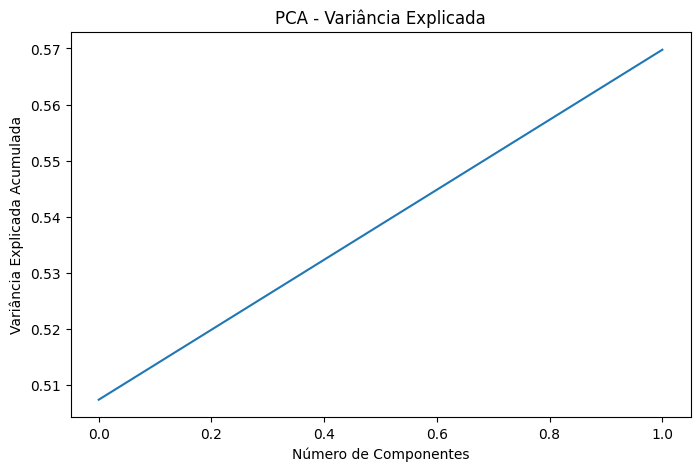

In [5]:
# Normalizar os dados
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Reduzir a dimensionalidade com PCA
pca = PCA(n_components=2)  # Altere para 3 se quiser visualizações em 3D
X_pca = pca.fit_transform(X_normalized)

print(f"Shape após PCA: {X_pca.shape}")

# Visualizar a variância explicada
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Acumulada')
plt.title('PCA - Variância Explicada')
plt.show()

# Implementação do K-means

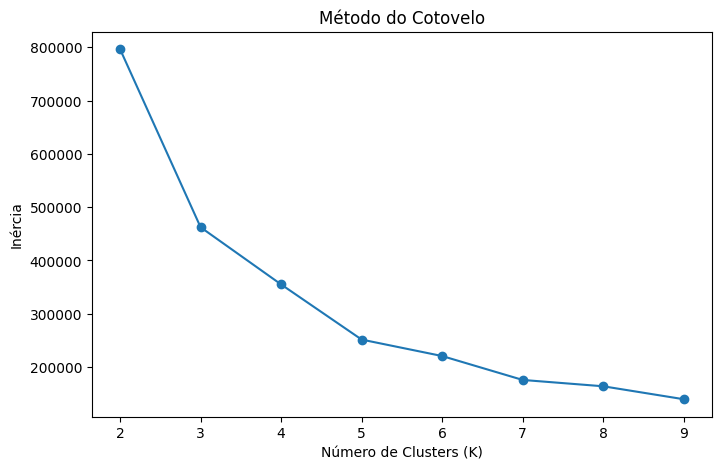

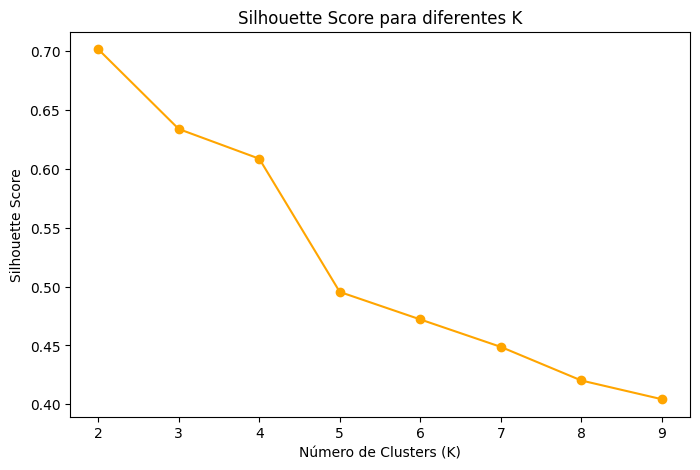

Clusters formados: [0 1 2 3]


In [6]:
# Escolher o número ideal de clusters usando o método do cotovelo
inertia = []
silhouette_scores = []
k_values = range(2, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_pca, kmeans.labels_))

# Visualizar o método do cotovelo
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()

# Visualizar silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para diferentes K')
plt.show()

# Escolher o número ideal de clusters baseado nos gráficos
best_k = 4  # Altere conforme os gráficos
kmeans = KMeans(n_clusters=best_k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_pca)

print(f"Clusters formados: {np.unique(clusters)}")

# Visualização dos Resultados

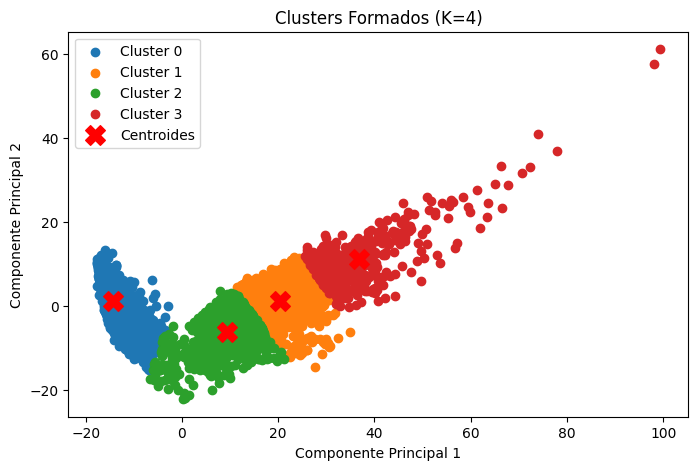

In [7]:
# Visualizar os clusters
plt.figure(figsize=(8, 5))
for cluster in np.unique(clusters):
    plt.scatter(X_pca[clusters == cluster, 0], X_pca[clusters == cluster, 1], label=f'Cluster {cluster}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroides', marker='X')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title(f'Clusters Formados (K={best_k})')
plt.legend()
plt.show()

# Análise e Avaliação

In [8]:
# Silhouette Score final
final_silhouette = silhouette_score(X_pca, clusters)
print(f"Silhouette Score Final: {final_silhouette}")

# Visualizar os centroides
print("Centroides dos clusters (no espaço reduzido pelo PCA):")
print(kmeans.cluster_centers_)

Silhouette Score Final: 0.6086222898948483
Centroides dos clusters (no espaço reduzido pelo PCA):
[[-14.31207841   1.13963374]
 [ 20.32975529   1.23264656]
 [  9.37613141  -6.18841411]
 [ 36.85508347  11.02876535]]


# Ajustes extras

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.preprocessing import StandardScaler
import zipfile
import gdown

import matplotlib.pyplot as plt

import os



# URL do arquivo no Google Drive
drive_url = "https://drive.google.com/uc?id=1mHErmi7eyo2b6an8tCOsj1FoJ54N7Pkg"

# Caminho para salvar o arquivo
zip_path = "UCI_HAR_Dataset.zip"

# Baixar o arquivo usando gdown
gdown.download(drive_url, zip_path, quiet=False)

# Extração do arquivo zip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("UCI_HAR_Dataset")

# Caminho dos dados extraídos
data_path = "UCI_HAR_Dataset/UCI HAR Dataset"

# Listar todos os arquivos e diretórios dentro da pasta extraída
for root, dirs, files in os.walk("UCI_HAR_Dataset"):
    print(f"Diretório: {root}")
    for file in files:
        print(f"  Arquivo: {file}")

# Etapa 2: Carregamento dos Dados
features = pd.read_csv("UCI_HAR_Dataset/UCI HAR Dataset/features.txt", delim_whitespace=True, header=None)
X_train = pd.read_csv("UCI_HAR_Dataset/UCI HAR Dataset/train/X_train.txt", delim_whitespace=True, header=None)
y_train = pd.read_csv("UCI_HAR_Dataset/UCI HAR Dataset/train/y_train.txt", header=None)




Downloading...
From (original): https://drive.google.com/uc?id=1mHErmi7eyo2b6an8tCOsj1FoJ54N7Pkg
From (redirected): https://drive.google.com/uc?id=1mHErmi7eyo2b6an8tCOsj1FoJ54N7Pkg&confirm=t&uuid=c1cebd28-5fda-4712-804b-a79405fc8a6f
To: /home/wesleiferreira/Documentos/GitHub/Analise-do-Algoritmo-de-K-means/UCI_HAR_Dataset.zip
100%|██████████| 61.0M/61.0M [00:05<00:00, 10.7MB/s]


Diretório: UCI_HAR_Dataset
Diretório: UCI_HAR_Dataset/UCI HAR Dataset
  Arquivo: .DS_Store
  Arquivo: activity_labels.txt
  Arquivo: features.txt
  Arquivo: features_info.txt
  Arquivo: README.txt
Diretório: UCI_HAR_Dataset/UCI HAR Dataset/test
  Arquivo: subject_test.txt
  Arquivo: X_test.txt
  Arquivo: y_test.txt
Diretório: UCI_HAR_Dataset/UCI HAR Dataset/test/Inertial Signals
  Arquivo: body_acc_x_test.txt
  Arquivo: body_acc_y_test.txt
  Arquivo: body_acc_z_test.txt
  Arquivo: body_gyro_x_test.txt
  Arquivo: body_gyro_y_test.txt
  Arquivo: body_gyro_z_test.txt
  Arquivo: total_acc_x_test.txt
  Arquivo: total_acc_y_test.txt
  Arquivo: total_acc_z_test.txt
Diretório: UCI_HAR_Dataset/UCI HAR Dataset/train
  Arquivo: subject_train.txt
  Arquivo: X_train.txt
  Arquivo: y_train.txt
Diretório: UCI_HAR_Dataset/UCI HAR Dataset/train/Inertial Signals
  Arquivo: body_acc_x_train.txt
  Arquivo: body_acc_y_train.txt
  Arquivo: body_acc_z_train.txt
  Arquivo: body_gyro_x_train.txt
  Arquivo: bod

/tmp/ipykernel_25783/3298130271.py:40: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  features = pd.read_csv("UCI_HAR_Dataset/UCI HAR Dataset/features.txt", delim_whitespace=True, header=None)
/tmp/ipykernel_25783/3298130271.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv("UCI_HAR_Dataset/UCI HAR Dataset/train/X_train.txt", delim_whitespace=True, header=None)


Adjusted Rand Index (ARI): 0.5240743347889816
Normalized Mutual Information (NMI): 0.6212799788183746


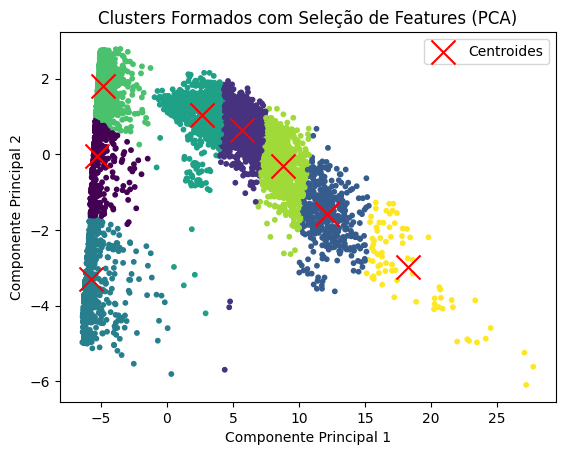

In [10]:
# Nomeando as colunas do X_train para facilitar a seleção
X_train.columns = features[1]

# Etapa 3: Normalização dos Dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Etapa 4: Seleção de Features (Usando SelectKBest com Informação Mútua)
# Selecionar as 50 features mais relevantes
selector = SelectKBest(score_func=mutual_info_classif, k=50)
X_selected = selector.fit_transform(X_scaled, y_train.values.ravel())

# Etapa 5: Redução de Dimensionalidade com PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_selected)

# Etapa 6: K-means com K=4
kmeans = KMeans(n_clusters=8, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_pca)

# Etapa 7: Métricas de Similaridade
# Transformar y_train para 1D
y_train_1d = y_train.values.ravel()

# Métricas de Similaridade
ari_score = adjusted_rand_score(y_train_1d, clusters)
nmi_score = normalized_mutual_info_score(y_train_1d, clusters)

print(f"Adjusted Rand Index (ARI): {ari_score}")
print(f"Normalized Mutual Information (NMI): {nmi_score}")



plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=10)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=300, c='red', marker='x', label='Centroides')
plt.title("Clusters Formados com Seleção de Features (PCA)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.show()

In [11]:
# Criando um DataFrame para analisar os clusters
import pandas as pd

# Adicionando os clusters ao DataFrame
cluster_analysis = pd.DataFrame({'Cluster': clusters, 'Activity': y_train.values.ravel()})

# Contando a frequência de cada atividade em cada cluster
cluster_summary = cluster_analysis.groupby(['Cluster', 'Activity']).size().unstack(fill_value=0)

print("Distribuição de atividades por cluster:")
print(cluster_summary)


Distribuição de atividades por cluster:
Activity    1    2    3    4     5     6
Cluster                                 
0           0    0    0  754    34   119
1         517  450  127    0     0     3
2          16    3  394    0     0     0
3           0    0    0   32     0  1220
4         518  488   33    2     0     5
5           0    0    0  498  1340    60
6         174  132  359    0     0     0
7           1    0   73    0     0     0


# Visualizar os clusters em relação às atividades

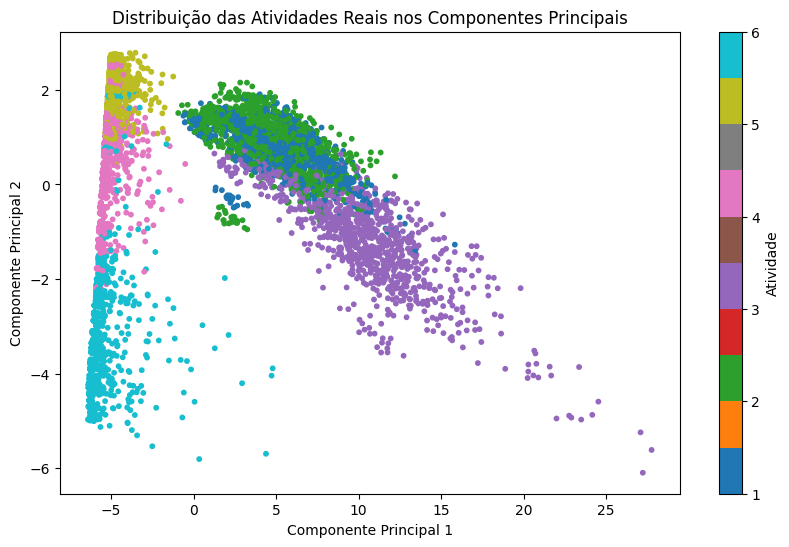

In [12]:
# Visualizando os clusters em relação às atividades reais
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train.values.ravel(), cmap='tab10', s=10)
plt.title("Distribuição das Atividades Reais nos Componentes Principais")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar(label='Atividade')
plt.show()


# Revisar as características dos clusters

In [13]:
# Adicionando os clusters ao DataFrame original das features selecionadas
cluster_features = pd.DataFrame(X_selected, columns=features.iloc[selector.get_support(indices=True), 1])
cluster_features['Cluster'] = clusters

# Calculando as estatísticas médias de cada feature por cluster
cluster_stats = cluster_features.groupby('Cluster').mean()

print("Características médias por cluster:")
print(cluster_stats)


Características médias por cluster:
1        tBodyAcc-std()-X  tBodyAcc-mad()-X  tBodyAcc-max()-X  \
Cluster                                                         
0               -0.839691         -0.832865         -0.842030   
1                0.886804          0.865331          0.915823   
2                1.879492          1.881257          1.833188   
3               -0.797157         -0.789921         -0.813601   
4                0.487386          0.479362          0.481552   
5               -0.843910         -0.839605         -0.833327   
6                1.378058          1.380379          1.420895   
7                2.515037          2.599570          2.076219   

1        tBodyAcc-min()-X  tBodyAcc-min()-Y  tBodyAcc-energy()-X  \
Cluster                                                            
0                0.846191          0.837695            -0.688382   
1               -0.989613         -0.988488             0.550293   
2               -1.655400         -1.4824

# Teste com outros modelos de redução de dimensionalidades

Aqui resolvemos testar outros modelos de redução de dimensionalidades para fins de comparação com o PCA que foi 
solicitado no trabalho.

t-SNE - Adjusted Rand Index (ARI): 0.6171419401109981
t-SNE - Normalized Mutual Information (NMI): 0.7298650011640668


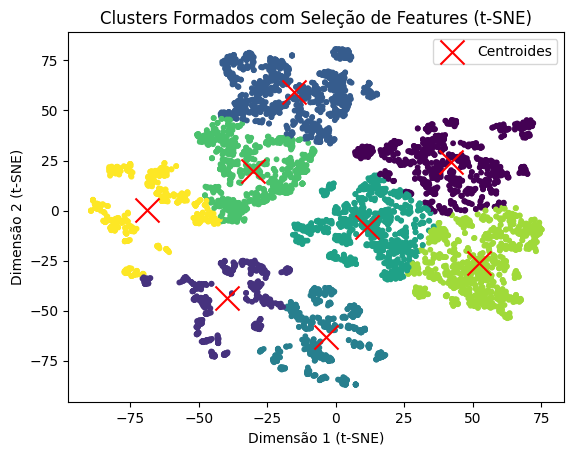

/home/wesleiferreira/.local/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP - Adjusted Rand Index (ARI): 0.5444907837263565
UMAP - Normalized Mutual Information (NMI): 0.6803863402522752


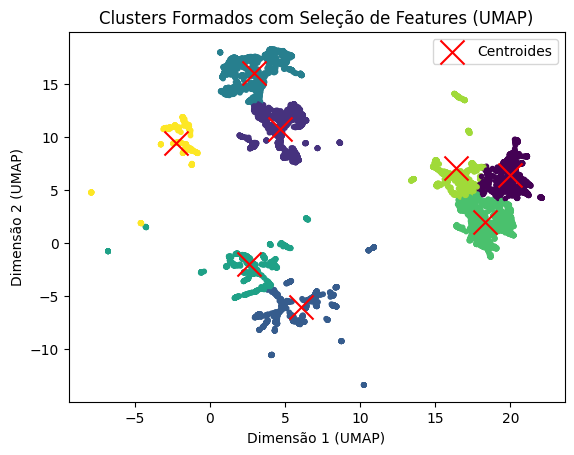

In [14]:
from sklearn.manifold import TSNE
import umap

#Nomeando as colunas do X_train para facilitar a seleção
X_train.columns = features[1]

# Etapa 3: Normalização dos Dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Etapa 4: Seleção de Features (Usando SelectKBest com Informação Mútua)
# Selecionar as 50 features mais relevantes
selector = SelectKBest(score_func=mutual_info_classif, k=50)
X_selected = selector.fit_transform(X_scaled, y_train.values.ravel())

# Redução de Dimensionalidade com t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_selected)

# Clusterização com K-means (t-SNE)
kmeans_tsne = KMeans(n_clusters=8, random_state=42, n_init=10)
clusters_tsne = kmeans_tsne.fit_predict(X_tsne)

# Métricas de Similaridade (t-SNE)
ari_tsne = adjusted_rand_score(y_train.values.ravel(), clusters_tsne)
nmi_tsne = normalized_mutual_info_score(y_train.values.ravel(), clusters_tsne)

print(f"t-SNE - Adjusted Rand Index (ARI): {ari_tsne}")
print(f"t-SNE - Normalized Mutual Information (NMI): {nmi_tsne}")

# Visualização dos Clusters com t-SNE
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters_tsne, cmap='viridis', s=10)
plt.scatter(kmeans_tsne.cluster_centers_[:, 0], kmeans_tsne.cluster_centers_[:, 1],
            s=300, c='red', marker='x', label='Centroides')
plt.title("Clusters Formados com Seleção de Features (t-SNE)")
plt.xlabel("Dimensão 1 (t-SNE)")
plt.ylabel("Dimensão 2 (t-SNE)")
plt.legend()
plt.show()

# Redução de Dimensionalidade com UMAP
umap_model = umap.UMAP(n_components=2, random_state=42, n_neighbors=15)
X_umap = umap_model.fit_transform(X_selected)

# Clusterização com K-means (UMAP)
kmeans_umap = KMeans(n_clusters=8, random_state=42, n_init=10)
clusters_umap = kmeans_umap.fit_predict(X_umap)

# Métricas de Similaridade (UMAP)
ari_umap = adjusted_rand_score(y_train.values.ravel(), clusters_umap)
nmi_umap = normalized_mutual_info_score(y_train.values.ravel(), clusters_umap)

print(f"UMAP - Adjusted Rand Index (ARI): {ari_umap}")
print(f"UMAP - Normalized Mutual Information (NMI): {nmi_umap}")

# Visualização dos Clusters com UMAP
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=clusters_umap, cmap='viridis', s=10)
plt.scatter(kmeans_umap.cluster_centers_[:, 0], kmeans_umap.cluster_centers_[:, 1],
            s=300, c='red', marker='x', label='Centroides')
plt.title("Clusters Formados com Seleção de Features (UMAP)")
plt.xlabel("Dimensão 1 (UMAP)")
plt.ylabel("Dimensão 2 (UMAP)")
plt.legend()
plt.show()

# Gráfico de distribuição de atividades para cada modelo de redução de dimensionalidade 

Aqui dedicamos essa seção para gerar o gráficos para comparar o desempenho do K-meas para cada 
método de redução de dimensionalidade são eles UMAP t-SNE

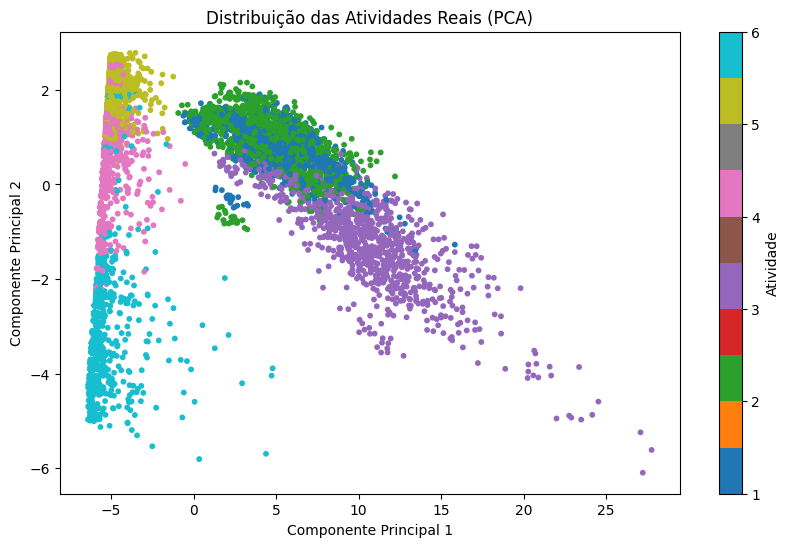

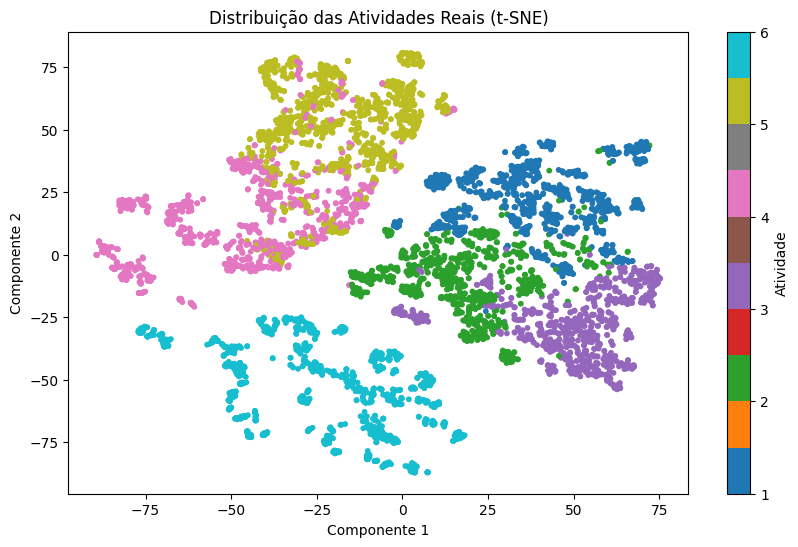

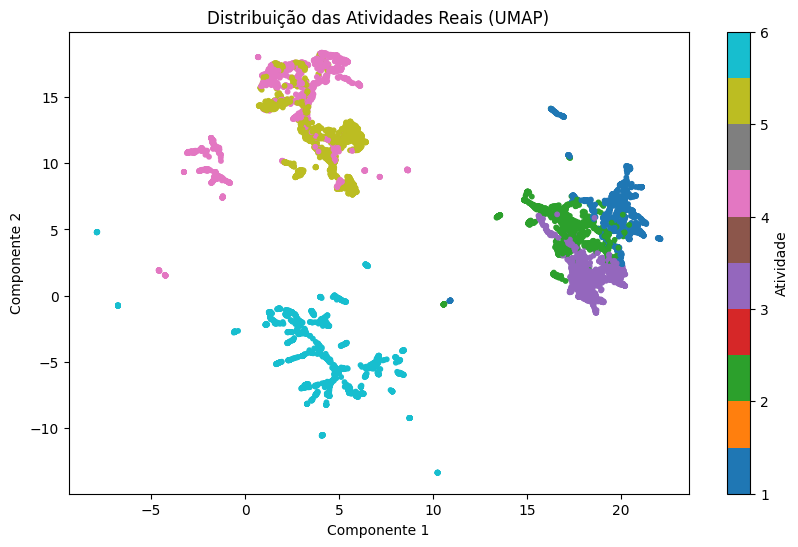

In [15]:
# PCA
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train.values.ravel(), cmap='tab10', s=10)
plt.title("Distribuição das Atividades Reais (PCA)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar(label='Atividade')
plt.show()

# t-SNE
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train.values.ravel(), cmap='tab10', s=10)
plt.title("Distribuição das Atividades Reais (t-SNE)")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.colorbar(label='Atividade')
plt.show()

# UMAP
plt.figure(figsize=(10, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_train.values.ravel(), cmap='tab10', s=10)
plt.title("Distribuição das Atividades Reais (UMAP)")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.colorbar(label='Atividade')
plt.show()

# Rede Neural para comparação

Aqui implementamos uma rede neural com o paradigma supervisionado para servir de comparação com o k-Meas

/home/wesleiferreira/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5298 - loss: 1.1192 - val_accuracy: 0.8887 - val_loss: 0.3560
Epoch 2/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8438 - loss: 0.3922 - val_accuracy: 0.8963 - val_loss: 0.2464
Epoch 3/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8917 - loss: 0.2802 - val_accuracy: 0.8955 - val_loss: 0.2397
Epoch 4/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9030 - loss: 0.2523 - val_accuracy: 0.9269 - val_loss: 0.1990
Epoch 5/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9203 - loss: 0.2177 - val_accuracy: 0.9116 - val_loss: 0.2020
Epoch 6/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9126 - loss: 0.2207 - val_accuracy: 0.9048 - val_loss: 0.2017
Epoch 7/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9238 - loss: 0.1964 - val_accuracy: 0.9133 - val_loss: 0.1829
Epoch 8/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9157 - loss: 0.2109 - val_accuracy: 0.

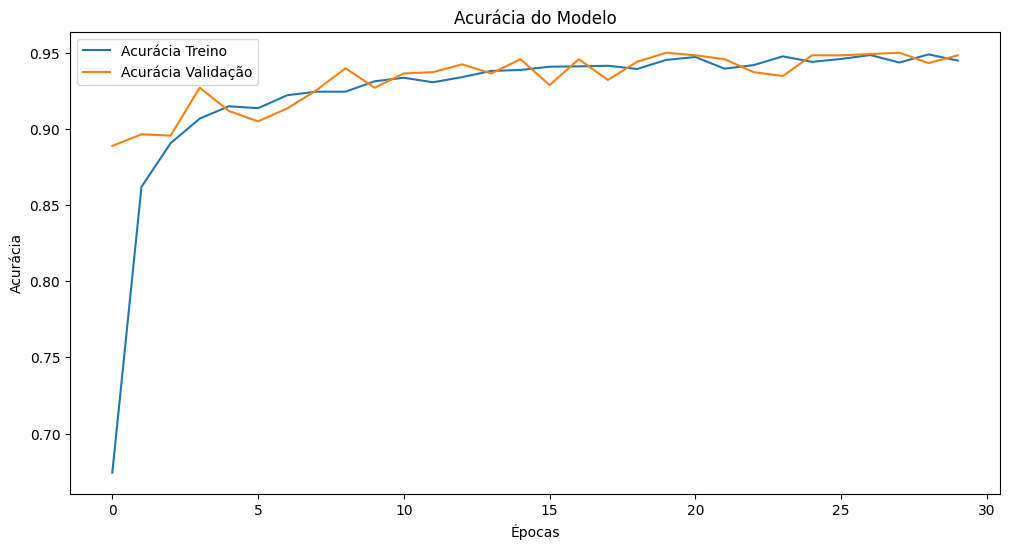

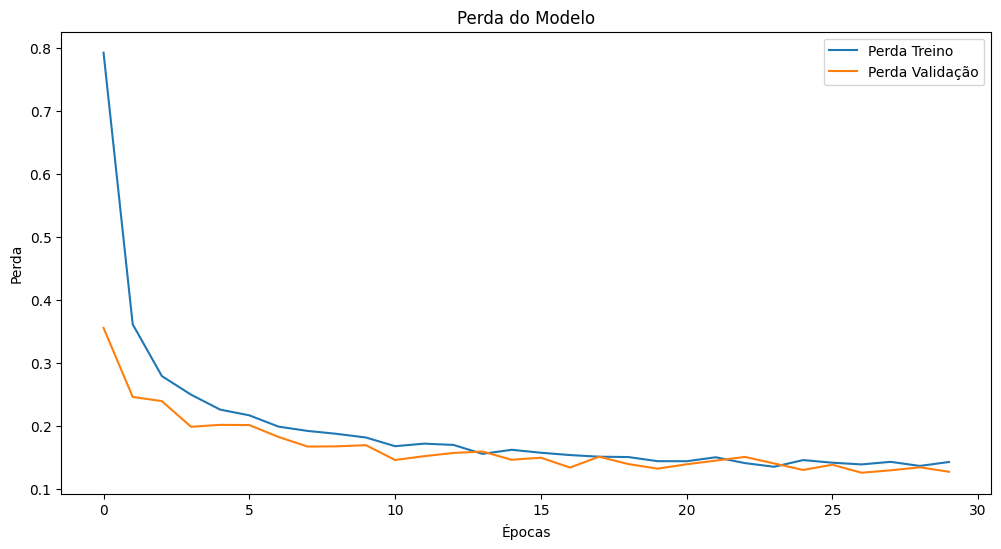

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential  # type: ignore
from tensorflow.keras.layers import Dense, Dropout # type: ignore
from tensorflow.keras.optimizers import Adam # type: ignore
import matplotlib.pyplot as plt

# Etapa 1: Normalização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)  

# Etapa 2: Seleção de features com SelectKBest
selector = SelectKBest(score_func=mutual_info_classif, k=50)
X_selected = selector.fit_transform(X_scaled, y_train.values.ravel())

# Etapa 3: Divisão dos dados em treino e teste
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    X_selected, y_train.values.ravel(), test_size=0.2, random_state=42, stratify=y_train
)

# Ajustando os rótulos para começar de 0, se necessário
y_train_split = y_train_split - 1
y_test_split = y_test_split - 1


# Etapa 4: Construção do modelo DNN
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train_split.shape[1]),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(len(set(y_train_split)), activation='softmax')  # Saída para cada classe
])

# Compilação do modelo
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Etapa 5: Treinamento
history = model.fit(X_train_split, y_train_split, 
                    validation_split=0.2, epochs=30, batch_size=32, verbose=1)

# Etapa 6: Avaliação no conjunto de teste
test_loss, test_accuracy = model.evaluate(X_test_split, y_test_split, verbose=0)

# Previsões e métricas
y_pred = model.predict(X_test_split)
y_pred_classes = y_pred.argmax(axis=1)

print(f"Accuracy no conjunto de teste: {test_accuracy}")
print("Relatório de Classificação:")
print(classification_report(y_test_split, y_pred_classes))
print("Matriz de Confusão:")
print(confusion_matrix(y_test_split, y_pred_classes))

# Etapa 7: Visualização do histórico de treinamento
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Acurácia Treino')
plt.plot(history.history['val_accuracy'], label='Acurácia Validação')
plt.title('Acurácia do Modelo')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Perda Treino')
plt.plot(history.history['val_loss'], label='Perda Validação')
plt.title('Perda do Modelo')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.show()


# Usado o t-SNE para representação vizual 

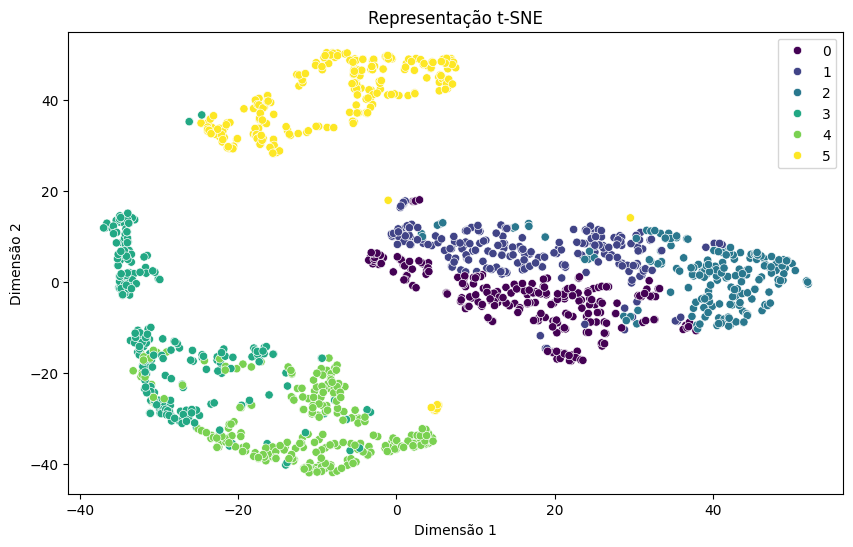

In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns

# Reduzir dimensionalidade com t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_test_split)  

# Criar o scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X_tsne[:, 0], 
    y=X_tsne[:, 1], 
    hue=y_test_split,  
    palette="viridis",
    legend="full"
)
plt.title("Representação t-SNE")
plt.xlabel("Dimensão 1")
plt.ylabel("Dimensão 2")
plt.show()


# Matriz de Confusão

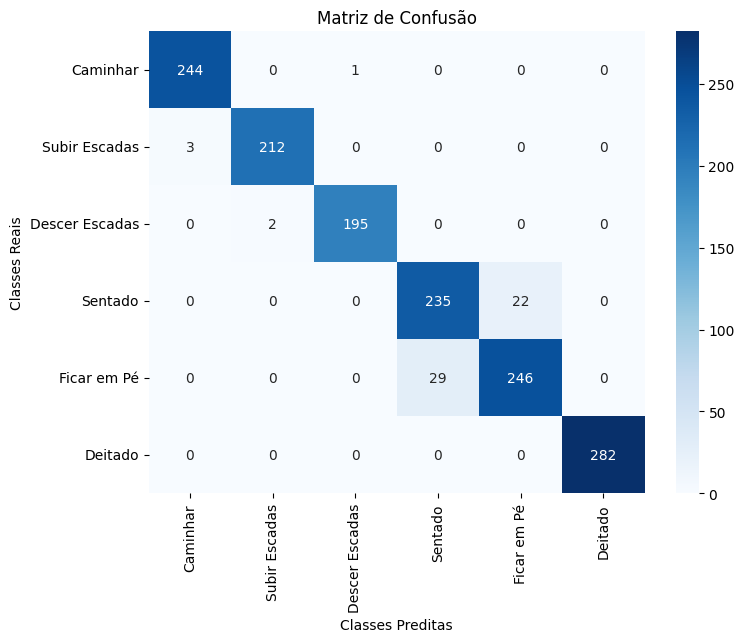

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Gerar a matriz de confusão
cm = confusion_matrix(y_test_split, y_pred_classes)
class_names = ["Caminhar", "Subir Escadas", "Descer Escadas", "Sentado", "Ficar em Pé", "Deitado"]


# Criar o heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Matriz de Confusão")
plt.xlabel("Classes Preditas")
plt.ylabel("Classes Reais")
plt.show()

